### Importando a biblioteca *pandas*

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lendo e visualizando os dados e atribuindo ao nome *df* e visualizando as 5 primeiras linhas

In [2]:
path = (
    'http://dadosabertos.c3sl.ufpr.br/curitiba/SaudeJa/'
    '2024-04-06_Sistema_Saude_Ja_Agendamentos_-_Base_de_Dados.csv'
       )

df = pd.read_csv(path, encoding='latin-1', sep=';')
df.head()

,COD_CIDADAO,UMS_AGENDAMENTO,COD_PROFISSIONAL,STATUS_AGENDAMENTO,REGIONAL_AGENDAMENTO,DATA_ATENDIMENTO,HORA_ATENDIMENTO,DESDOBRAMENTO,TIPO_USUARIO,COD_AGENDA
0,2488659,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,22/03/2024,11:15,NÃO,PRINCIPAL,29481481
1,10933048,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,22/03/2024,10:30,NÃO,PRINCIPAL,29481481
2,3473033,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,22/03/2024,11:45,NÃO,PRINCIPAL,29481481
3,5274469,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,22/03/2024,10:15,NÃO,PRINCIPAL,29481481
4,4096165,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,21/03/2024,10:00,NÃO,PRINCIPAL,29481481


In [3]:
df['HORA_ATENDIMENTO'].describe()

count     103932
unique       198
top        10:00
freq        6404
Name: HORA_ATENDIMENTO, dtype: object

### Lendo o dicionário dos dados e atribuindo ao nome *dictionary* para futuras consultas sobre os valores presentes nas colunas:

In [4]:
path = (
    'http://dadosabertos.c3sl.ufpr.br/curitiba/SaudeJa/'
    '2019-07-30_Sistema_Saude_Ja_Agendamentos_-_Dicionario_de_Dados.csv')
dictionary = pd.read_csv(path, encoding='latin-1', sep=';')
dictionary = dictionary.to_dict(orient='index')

dictionary[df.columns.get_loc('COD_AGENDA')]

{'Nome do Campo': 'COD_AGENDA',
 'Descrição': 'Código único da agenda',
 'Tipo': 'NUMBER',
 'Tamanho': 10}

### Verificando quantas unidades de saúde únicas estão presentes no dataframe:

In [5]:
df['UMS_AGENDAMENTO'].nunique()

107

### Verificando quantos centros regionais estão sendo contemplados neste dataframe:

In [6]:
df['REGIONAL_AGENDAMENTO'].nunique()

10

### Verificando o nome dos centros regionais contemplados:

In [7]:
df['REGIONAL_AGENDAMENTO'].unique()

array(['BOA VISTA', 'BAIRRO NOVO', 'CAJURU', 'PINHEIRINHO', 'PORTAO',
       'CIC', 'SANTA FELICIDADE', 'TATUQUARA', 'MATRIZ', 'BOQUEIRAO'],
      dtype=object)

### Verificando os valores únicos presentes na coluna *STATUS_AGENDAMENTO*:

In [8]:
df['STATUS_AGENDAMENTO'].unique()

array(['Faltoso', 'Remanejado', 'Realizado', 'Cancelado',
       'Aguardando Remanejamento'], dtype=object)

### Verificando os valores únicos presentes na coluna *DESDOBRAMENTO*:

In [9]:
df['DESDOBRAMENTO'].nunique()

186

## Verificando os valores únicos da coluna *TIPO_USUARIO*

In [10]:
df['TIPO_USUARIO'].unique()

array(['PRINCIPAL'], dtype=object)

### Visualizando colunas com valores ausentes e a classificação dos valores em cada coluna:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103932 entries, 0 to 103931
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   COD_CIDADAO           103932 non-null  int64 
 1   UMS_AGENDAMENTO       103932 non-null  object
 2   COD_PROFISSIONAL      103932 non-null  int64 
 3   STATUS_AGENDAMENTO    103932 non-null  object
 4   REGIONAL_AGENDAMENTO  103932 non-null  object
 5   DATA_ATENDIMENTO      103932 non-null  object
 6   HORA_ATENDIMENTO      103932 non-null  object
 7   DESDOBRAMENTO         103932 non-null  object
 8   TIPO_USUARIO          103932 non-null  object
 9   COD_AGENDA            103932 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 7.9+ MB


### Convertendo os valores das colunas *DATA_ATENDIMENTO* e *HORA_ATENDIMENTO* para o formato *datetime*:

In [12]:
df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], format='%d/%m/%Y')
df['HORA_ATENDIMENTO'] = pd.to_datetime(df['HORA_ATENDIMENTO'], format='%H:%M').dt.hour

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103932 entries, 0 to 103931
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   COD_CIDADAO           103932 non-null  int64         
 1   UMS_AGENDAMENTO       103932 non-null  object        
 2   COD_PROFISSIONAL      103932 non-null  int64         
 3   STATUS_AGENDAMENTO    103932 non-null  object        
 4   REGIONAL_AGENDAMENTO  103932 non-null  object        
 5   DATA_ATENDIMENTO      103932 non-null  datetime64[ns]
 6   HORA_ATENDIMENTO      103932 non-null  int64         
 7   DESDOBRAMENTO         103932 non-null  object        
 8   TIPO_USUARIO          103932 non-null  object        
 9   COD_AGENDA            103932 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 7.9+ MB


In [13]:
df['HORA_ATENDIMENTO'].describe()

count    103932.000000
mean         12.340261
std           2.904865
min           7.000000
25%          10.000000
50%          11.000000
75%          15.000000
max          19.000000
Name: HORA_ATENDIMENTO, dtype: float64

# EDA - Exploratory Data Analysis

## Verificação da proporção atendida por cada unidade de saúde

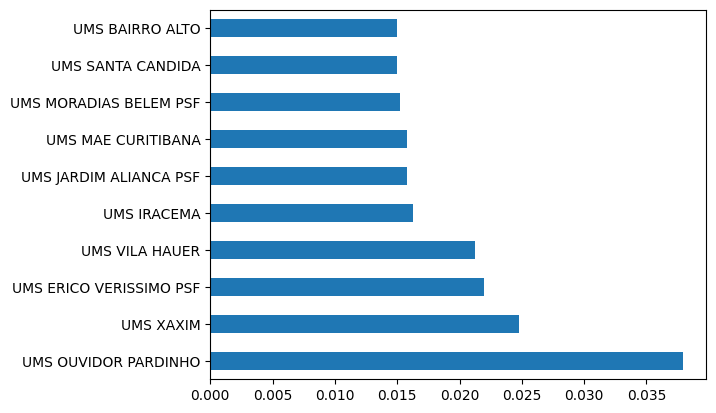

UMS OUVIDOR PARDINHO       0.037900
UMS XAXIM                  0.024805
UMS ERICO VERISSIMO PSF    0.021947
UMS VILA HAUER             0.021245
UMS IRACEMA                0.016309
UMS JARDIM ALIANCA PSF     0.015828
UMS MAE CURITIBANA         0.015760
UMS MORADIAS BELEM PSF     0.015202
UMS SANTA CANDIDA          0.014991
UMS BAIRRO ALTO            0.014971
Name: UMS_AGENDAMENTO, dtype: float64

In [14]:
(
    df['UMS_AGENDAMENTO'].value_counts(normalize=True)
    .head(10)
    .plot(kind='barh')
    .figure
    .savefig('prop-UMS.pdf', bbox_inches='tight')
)
plt.show()
df['UMS_AGENDAMENTO'].value_counts(normalize=True).head(10)

## Visualizando a proporção de pacientes por centros regionais

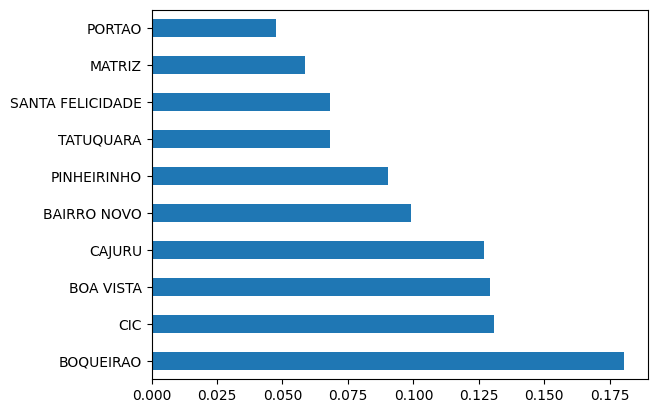

BOQUEIRAO           0.180435
CIC                 0.130845
BOA VISTA           0.129440
CAJURU              0.126862
BAIRRO NOVO         0.099248
PINHEIRINHO         0.090434
TATUQUARA           0.068237
SANTA FELICIDADE    0.068227
MATRIZ              0.058721
PORTAO              0.047550
Name: REGIONAL_AGENDAMENTO, dtype: float64

In [15]:
(
    df['REGIONAL_AGENDAMENTO'].value_counts(normalize=True)
    .plot(kind='barh')
    .figure
    .savefig('reg-prop.pdf', bbox_inches='tight')
)
plt.show()
df['REGIONAL_AGENDAMENTO'].value_counts(normalize=True)

<AxesSubplot: ylabel='REGIONAL_AGENDAMENTO'>

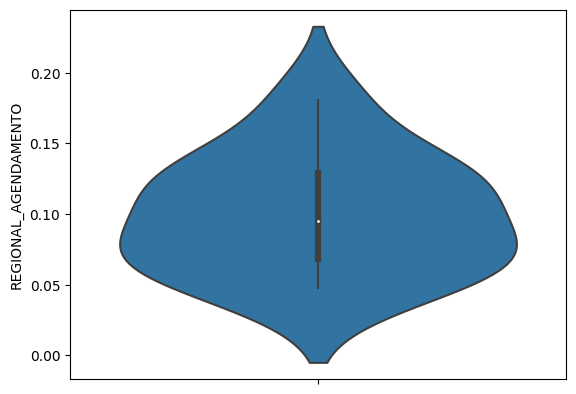

In [16]:
df2 = df['REGIONAL_AGENDAMENTO'].value_counts(normalize=True).reset_index()
df2
sns.violinplot(data=df2, y='REGIONAL_AGENDAMENTO', hue='index')

## Visualizando a distribuição do horário de atendimento pelo histograma e pelo kde

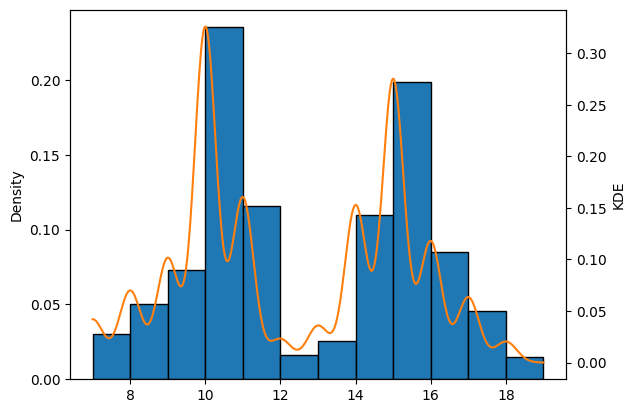

In [17]:
ax = df['HORA_ATENDIMENTO'].plot(kind='hist', bins=12, edgecolor='black', density=True)
(
    df['HORA_ATENDIMENTO']
    .plot(kind='kde', ax=ax, secondary_y=True, ind=np.linspace(7, 19, 500), ylabel='KDE')
    .figure
    .savefig('hist.pdf')
)

## Visualizando a proporção de atendimentos por intervalo de hora

In [18]:
df['HORA_ATENDIMENTO'].value_counts(normalize=True).sort_index()

7     0.030251
8     0.050321
9     0.072826
10    0.235192
11    0.115508
12    0.016463
13    0.025699
14    0.109995
15    0.198601
16    0.084757
17    0.045684
18    0.014683
19    0.000019
Name: HORA_ATENDIMENTO, dtype: float64

## Gerando a coluna *TURNO* com os valore *Manhã*, *Tarde* e *Noite*

In [19]:
df['TURNO'] = np.where(df['HORA_ATENDIMENTO'] < 12, 'Manhã',
                       np.where((df['HORA_ATENDIMENTO'] >= 12) & (df['HORA_ATENDIMENTO'] < 18), 'Tarde', 'Noite'))

df.head()

,COD_CIDADAO,UMS_AGENDAMENTO,COD_PROFISSIONAL,STATUS_AGENDAMENTO,REGIONAL_AGENDAMENTO,DATA_ATENDIMENTO,HORA_ATENDIMENTO,DESDOBRAMENTO,TIPO_USUARIO,COD_AGENDA,TURNO
0,2488659,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,2024-03-22,11,NÃO,PRINCIPAL,29481481,Manhã
1,10933048,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,2024-03-22,10,NÃO,PRINCIPAL,29481481,Manhã
2,3473033,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,2024-03-22,11,NÃO,PRINCIPAL,29481481,Manhã
3,5274469,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,2024-03-22,10,NÃO,PRINCIPAL,29481481,Manhã
4,4096165,UMS BAIRRO ALTO,68206,Faltoso,BOA VISTA,2024-03-21,10,NÃO,PRINCIPAL,29481481,Manhã


## Plotando o gráfico com as proporções de agendamentos por turno:

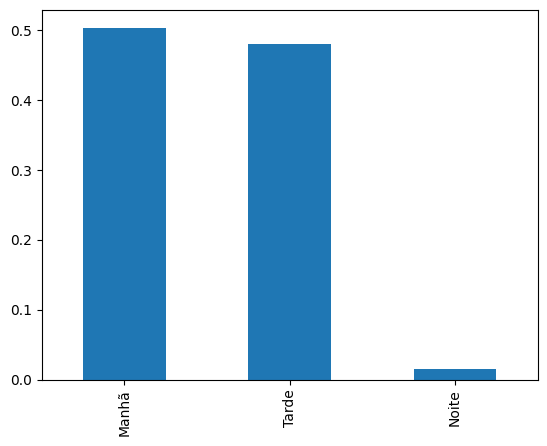

In [20]:
(
    df['TURNO'].value_counts(normalize=True)
    .plot(kind='bar')
    .figure
    .savefig('prop-turn.pdf', bbox_inches='tight')
)

## Atualizando a coluna *TURNO* juntando os atendimentos da noite com os da tarde e plotando seu gráfico de barras

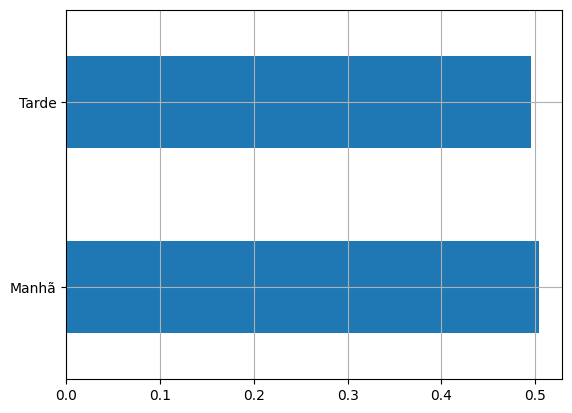

In [21]:
df['TURNO'] = np.where(df['HORA_ATENDIMENTO'] < 12, 'Manhã', 'Tarde')

(
    df['TURNO'].value_counts(normalize=True)
    .plot(kind='barh', grid=True)
    .figure
    .savefig('prop-turn.pdf', bbox_inches='tight')
)

## Distribuição das proporções das situações dos agendamentos:

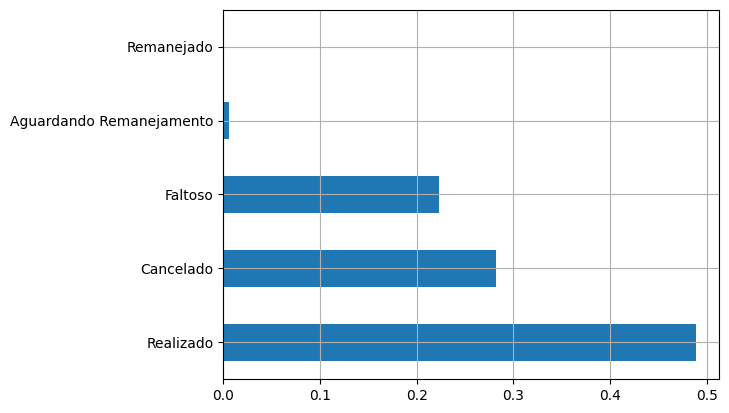

Realizado                   0.488262
Cancelado                   0.282223
Faltoso                     0.223175
Aguardando Remanejamento    0.005821
Remanejado                  0.000520
Name: STATUS_AGENDAMENTO, dtype: float64

In [22]:
(
    df['STATUS_AGENDAMENTO'].value_counts(normalize=True)
    .plot(kind='barh', grid=True)
    .figure
    .savefig('prop-sit.pdf', bbox_inches='tight')
)
plt.show()

df['STATUS_AGENDAMENTO'].value_counts(normalize=True)

# 2ª Parte do Trabalho

## Verificando a proporção de agendamentos classificados como "Faltoso" por unidade de saúde

### Criando a tabela pivô com as frequências absolutas de cada classificação por unidade de saúde

In [23]:
prop_f_us = pd.pivot_table(
    data=df, 
    index='UMS_AGENDAMENTO',
    columns='STATUS_AGENDAMENTO',
    aggfunc='size',
    fill_value=0
)

prop_f_us

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado
UMS_AGENDAMENTO,,,,,
UMS ABAETE,3,274,188,457,0
UMS ABRANCHES,3,200,150,385,0
UMS ALVORADA PSF,7,369,356,743,0
UMS ATENAS,0,223,148,404,0
UMS ATUBA,7,61,38,95,0
...,...,...,...,...,...
UMS VISTA ALEGRE,2,169,160,269,0
UMS VITORIA REGIA PSF,11,229,172,527,0
UMS WALDEMAR MONASTIER PSF,6,193,178,356,0


### Criando a coluna com as proporções de agendamentos "faltoso" por unidade de saúde

In [24]:
# Criando a coluna Total com a soma dos agendamentos por unidade de saúde
prop_f_us['Total'] = prop_f_us.sum(axis=1)

# Criando a coluna "Proporção Faltoso" com as proporções de agendamentos 
# "Faltoso" por unidade de saúde
prop_f_us['Proporção Faltoso'] = prop_f_us['Faltoso'] \
                                    / prop_f_us['Total']

# Dispondo seus valores em ordem decrescente e atualizando a tabela prop_f_us
prop_f_us.sort_values(by='Proporção Faltoso', 
                      ascending=False, 
                      inplace=True)

# Visualizando as 10 Unidades de saúde com maiores proporções de "Faltoso"
prop_f_us.head(10)

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Proporção Faltoso
UMS_AGENDAMENTO,,,,,,,
UMS CAMARGO,0,34,39,22,0,95,0.410526
UMS PALMEIRAS PSF,0,153,157,202,0,512,0.306641
UMS MONTEIRO LOBATO PSF,12,313,312,391,0,1028,0.303502
UMS MAE CURITIBANA,7,553,496,582,0,1638,0.302808
UMS UBERABA DE CIMA,4,236,240,313,0,793,0.302648
UMS LOTIGUACU PSF,10,306,286,377,0,979,0.292135
UMS OSWALDO CRUZ PSF,0,160,164,240,0,564,0.290780
UMS NOSSA SENHORA DA LUZ PSF,3,136,153,247,0,539,0.283859
UMS BAIRRO ALTO,0,471,440,645,0,1556,0.282776


In [25]:
prop_f_us['Proporção Faltoso'].describe()

count    107.000000
mean       0.228953
std        0.040803
min        0.121753
25%        0.204556
50%        0.226366
75%        0.253115
max        0.410526
Name: Proporção Faltoso, dtype: float64

In [26]:
prop_f_us['Proporção Faltoso'].mode()

0      0.121753
1      0.138750
2      0.145138
3      0.158702
4      0.162025
         ...   
102    0.302648
103    0.302808
104    0.303502
105    0.306641
106    0.410526
Name: Proporção Faltoso, Length: 107, dtype: float64

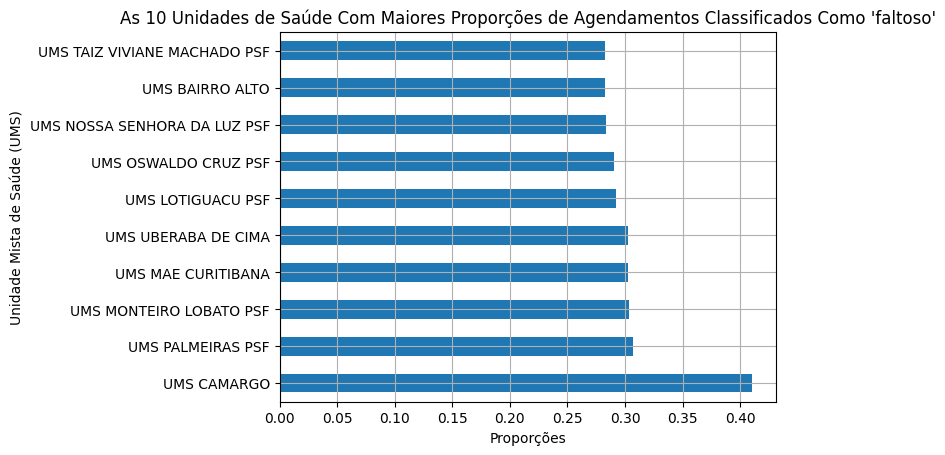

In [27]:
(prop_f_us['Proporção Faltoso']
 .head(10)
 .plot(kind='barh', 
       title="As 10 Unidades de Saúde Com Maiores Proporções de Agendamentos Classificados Como 'faltoso'", 
       xlabel='Proporções',
       ylabel='Unidade Mista de Saúde (UMS)',
       grid=True)
 .figure
 .savefig('top10faltosoUMS.pdf', bbox_inches='tight')
)

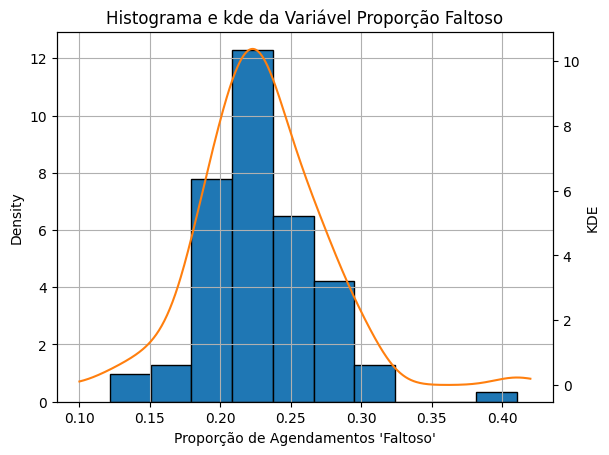

In [28]:
ax = (
    prop_f_us['Proporção Faltoso']
    .plot(kind='hist', 
          density=True, 
          edgecolor='black', 
          title="Histograma e kde da Variável Proporção Faltoso",
          grid=True,
         )    
)
ax.set(xlabel="Proporção de Agendamentos 'Faltoso'", ylabel='Densidade')
(
    prop_f_us['Proporção Faltoso']
    .plot(kind='kde', ax=ax, secondary_y=True, ind=np.linspace(0.1, 0.42, 500), ylabel='KDE')
    .figure
    .savefig('hist2.pdf')
)

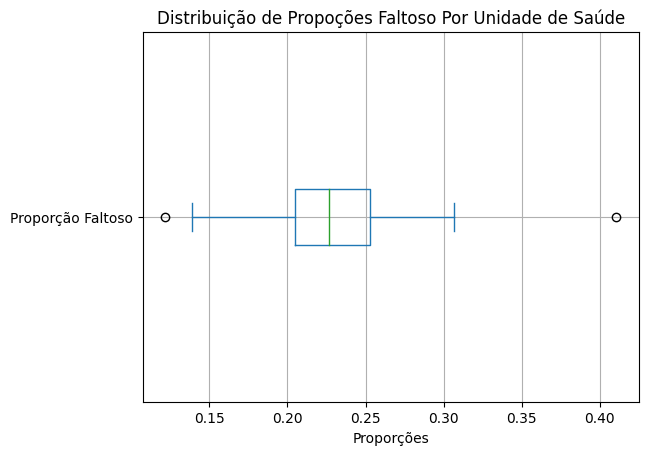

In [29]:
(
    prop_f_us['Proporção Faltoso']
    .plot(kind='box', 
          title='Distribuição de Propoções Faltoso Por Unidade de Saúde', 
          xlabel='Proporções',
          grid=True,
          vert=False)
    .figure
    .savefig('box-prop-ums.pdf', bbox_inches='tight')
)

In [30]:
prop_f_us['Proporção Faltoso'].head(2)

UMS_AGENDAMENTO
UMS CAMARGO          0.410526
UMS PALMEIRAS PSF    0.306641
Name: Proporção Faltoso, dtype: float64

In [31]:
prop_f_us['Proporção Faltoso'].tail(1)

UMS_AGENDAMENTO
UMS VISITACAO    0.121753
Name: Proporção Faltoso, dtype: float64

In [32]:
prop_f_us['Proporção Faltoso'].describe()

count    107.000000
mean       0.228953
std        0.040803
min        0.121753
25%        0.204556
50%        0.226366
75%        0.253115
max        0.410526
Name: Proporção Faltoso, dtype: float64

<AxesSubplot: xlabel='Proporção Faltoso'>

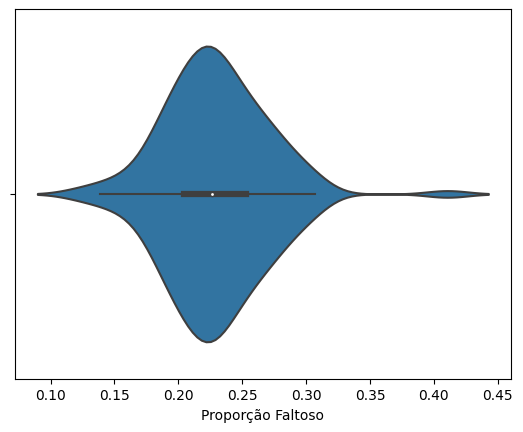

In [40]:
#sns.set_style('darkgrid')
sns.violinplot(data=prop_f_us, x='Proporção Faltoso')

## Verificando quantos centros regionais cada unidade de saúde atende

In [41]:
# Agrupando os dados por unidade de saúde e verificando quantos centros 
# regionais estão sendo atendidas
cr_ums = (
    df.groupby('UMS_AGENDAMENTO')['REGIONAL_AGENDAMENTO']
    .nunique()
    .reset_index()
)
cr_ums.head()

,UMS_AGENDAMENTO,REGIONAL_AGENDAMENTO
0,UMS ABAETE,1
1,UMS ABRANCHES,1
2,UMS ALVORADA PSF,1
3,UMS ATENAS,1
4,UMS ATUBA,1


Verificando quantas unidades de saúde atendem mais que 1 centro regional:

In [42]:
cr_ums[cr_ums['REGIONAL_AGENDAMENTO']!=1]

,UMS_AGENDAMENTO,REGIONAL_AGENDAMENTO


## Verificando a proporção de agendamentos "Faltoso" por centro regional

Inicialmente será criando a tabela pivô na qual 

* Cada índice representa um centro regional;
* Cada coluna é um valor da classifacação do agendamento
* Os valores de cada coluna são as frequências absolutas daquela variável em relação ao cento regional.

In [43]:
centro_reg_pivot = df.pivot_table(index='REGIONAL_AGENDAMENTO', 
                                  columns='STATUS_AGENDAMENTO', 
                                  aggfunc='size', 
                                  fill_value=0)
centro_reg_pivot

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado
REGIONAL_AGENDAMENTO,,,,,
BAIRRO NOVO,65,2924,2452,4872,2
BOA VISTA,74,3942,2884,6553,0
BOQUEIRAO,103,5129,3429,10092,0
CAJURU,102,3656,3238,6168,21
CIC,80,3751,3257,6511,0
MATRIZ,8,1888,1470,2727,10
PINHEIRINHO,43,2587,2056,4712,1
PORTAO,34,1378,1121,2401,8
SANTA FELICIDADE,59,2031,1519,3473,9


Criando a coluna com o total de agendamentos por centro regional

In [44]:
centro_reg_pivot['Total'] = centro_reg_pivot.sum(axis=1)
centro_reg_pivot

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total
REGIONAL_AGENDAMENTO,,,,,,
BAIRRO NOVO,65,2924,2452,4872,2,10315
BOA VISTA,74,3942,2884,6553,0,13453
BOQUEIRAO,103,5129,3429,10092,0,18753
CAJURU,102,3656,3238,6168,21,13185
CIC,80,3751,3257,6511,0,13599
MATRIZ,8,1888,1470,2727,10,6103
PINHEIRINHO,43,2587,2056,4712,1,9399
PORTAO,34,1378,1121,2401,8,4942
SANTA FELICIDADE,59,2031,1519,3473,9,7091


Criando a coluna *Proporção Faltoso* contendo as proporções de de agendamentos "faltoso" por centro regional.

In [45]:
centro_reg_pivot['Proporção Faltoso'] = centro_reg_pivot['Faltoso'] / centro_reg_pivot['Total']
centro_reg_pivot

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Proporção Faltoso
REGIONAL_AGENDAMENTO,,,,,,,
BAIRRO NOVO,65,2924,2452,4872,2,10315,0.237712
BOA VISTA,74,3942,2884,6553,0,13453,0.214376
BOQUEIRAO,103,5129,3429,10092,0,18753,0.182851
CAJURU,102,3656,3238,6168,21,13185,0.245582
CIC,80,3751,3257,6511,0,13599,0.239503
MATRIZ,8,1888,1470,2727,10,6103,0.240865
PINHEIRINHO,43,2587,2056,4712,1,9399,0.218747
PORTAO,34,1378,1121,2401,8,4942,0.226831
SANTA FELICIDADE,59,2031,1519,3473,9,7091,0.214215


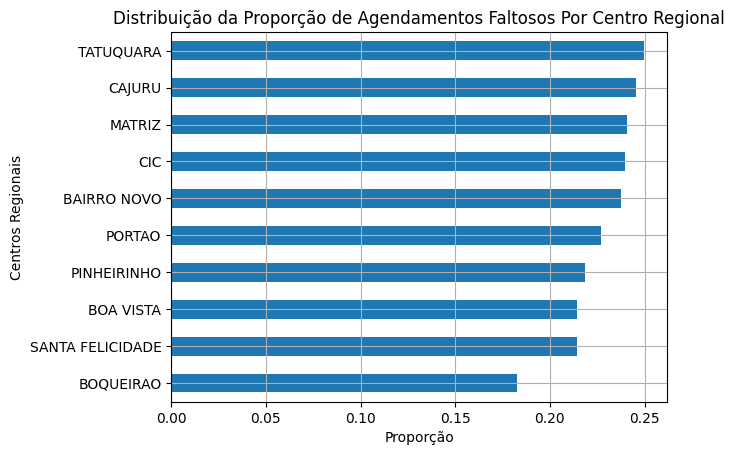

In [46]:
(
    centro_reg_pivot['Proporção Faltoso'].sort_values()
    .plot(kind='barh', 
          grid=True, 
          title='Distribuição da Proporção de Agendamentos Faltosos Por Centro Regional', 
          xlabel='Proporção', 
          ylabel='Centros Regionais'
         )
    .figure
    .savefig('prop-cr.pdf', bbox_inches='tight')
)

In [47]:
centro_reg_pivot['Proporção Faltoso'].describe()

count    10.000000
mean      0.227012
std       0.020144
min       0.182851
25%       0.215469
50%       0.232272
75%       0.240525
max       0.249436
Name: Proporção Faltoso, dtype: float64

In [48]:
centro_reg_pivot['Proporção Faltoso'].mode()

0    0.182851
1    0.214215
2    0.214376
3    0.218747
4    0.226831
5    0.237712
6    0.239503
7    0.240865
8    0.245582
9    0.249436
Name: Proporção Faltoso, dtype: float64

Text(0.5, 1.0, "Proporção de Agendamentos 'Faltoso' Por Centro Regional")

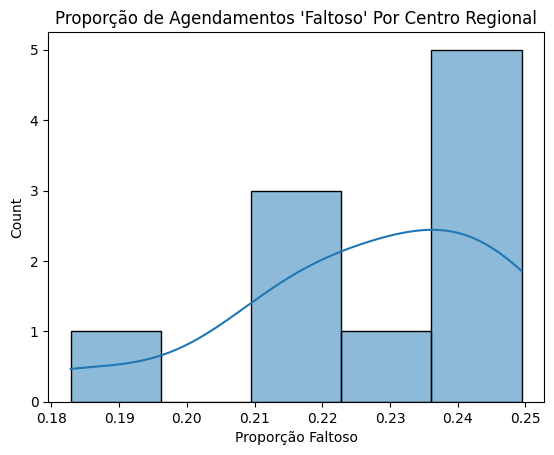

In [49]:
ax = sns.histplot(data=centro_reg_pivot, x='Proporção Faltoso', kde=True)
ax.set_title("Proporção de Agendamentos 'Faltoso' Por Centro Regional")

<AxesSubplot: xlabel='Proporção Faltoso'>

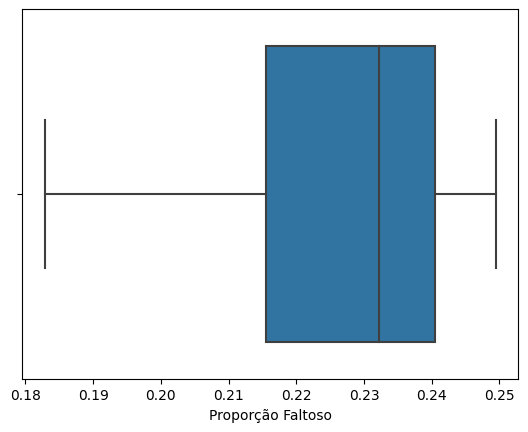

In [50]:
sns.boxplot(data=centro_reg_pivot, x='Proporção Faltoso')

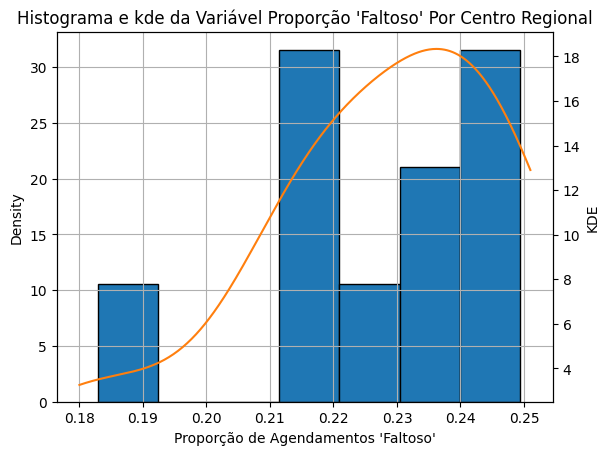

In [59]:
ax = (
    centro_reg_pivot['Proporção Faltoso']
    .plot(kind='hist', 
          density=True, 
          edgecolor='black', 
          title="Histograma e kde da Variável Proporção 'Faltoso' Por Centro Regional",
          grid=True,
          bins=7
         )    
)
ax.set_xlabel("Proporção de Agendamentos 'Faltoso'")
ax.set_ylabel('Densidade')
(
    centro_reg_pivot['Proporção Faltoso']
    .plot(kind='kde', ax=ax, secondary_y=True, ind=np.linspace(0.18, 0.251, 500), ylabel='KDE')
    .figure
    .savefig('hist-cent.reg.pdf')
)

<AxesSubplot: >

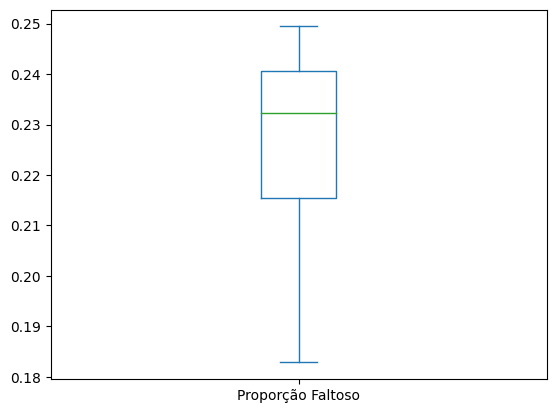

In [52]:
centro_reg_pivot['Proporção Faltoso'].plot(kind='box')

In [53]:

centro_reg_pivot.sort_values(by='Proporção Faltoso', ascending=False)

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Proporção Faltoso
REGIONAL_AGENDAMENTO,,,,,,,
TATUQUARA,37,2046,1769,3237,3,7092,0.249436
CAJURU,102,3656,3238,6168,21,13185,0.245582
MATRIZ,8,1888,1470,2727,10,6103,0.240865
CIC,80,3751,3257,6511,0,13599,0.239503
BAIRRO NOVO,65,2924,2452,4872,2,10315,0.237712
PORTAO,34,1378,1121,2401,8,4942,0.226831
PINHEIRINHO,43,2587,2056,4712,1,9399,0.218747
BOA VISTA,74,3942,2884,6553,0,13453,0.214376
SANTA FELICIDADE,59,2031,1519,3473,9,7091,0.214215


## Analise das distribuições de agendamentos faltosos por turno

Criando a tabela pivô com os índices indicando os turnos e as colunas indicando as classificações agendamentos cujos valores são suas frequências absolutas:

In [54]:
pivot_turno = df.pivot_table(index='TURNO', columns='STATUS_AGENDAMENTO', aggfunc='size')
pivot_turno

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado
TURNO,,,,,
Manhã,321,14696,11339,26007,29
Tarde,284,14636,11856,24739,25


Calculando o total de agendamentos por turno

In [55]:
pivot_turno['Total'] = pivot_turno.sum(axis=1)
pivot_turno

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total
TURNO,,,,,,
Manhã,321,14696,11339,26007,29,52392
Tarde,284,14636,11856,24739,25,51540


Calculando as prporções de agendamentos "Faltoso" por turno:

In [56]:
pivot_turno['Proporção Faltoso'] = pivot_turno['Faltoso'] / pivot_turno['Total']
pivot_turno

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Proporção Faltoso
TURNO,,,,,,,
Manhã,321,14696,11339,26007,29,52392,0.216426
Tarde,284,14636,11856,24739,25,51540,0.230035


In [64]:
len(df) - df['COD_CIDADAO'].nunique()

39207

In [63]:
len(df)

103932

In [65]:
import scipy.stats.distributions as dist

## Calculando as distribuição das proporções de agendamentos "Realizado" Por unidade de saúde.

In [69]:
prop_r_us = pd.pivot_table(
    data=df, 
    index='UMS_AGENDAMENTO',
    columns='STATUS_AGENDAMENTO',
    aggfunc='size',
    fill_value=0
)

prop_r_us

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado
UMS_AGENDAMENTO,,,,,
UMS ABAETE,3,274,188,457,0
UMS ABRANCHES,3,200,150,385,0
UMS ALVORADA PSF,7,369,356,743,0
UMS ATENAS,0,223,148,404,0
UMS ATUBA,7,61,38,95,0
...,...,...,...,...,...
UMS VISTA ALEGRE,2,169,160,269,0
UMS VITORIA REGIA PSF,11,229,172,527,0
UMS WALDEMAR MONASTIER PSF,6,193,178,356,0


In [70]:
# Criando a coluna Total com a soma dos agendamentos por unidade de saúde
prop_r_us['Total'] = prop_r_us.sum(axis=1)

# Criando a coluna "Proporção de Realizado" com as proporções de agendamentos 
# realizado por unidade de saúde
prop_r_us['Proporção Realizado'] = prop_r_us['Realizado'] \
                                    / prop_r_us['Total']

# Ordenando em ordem decrescente
prop_r_us.sort_values(by='Proporção Realizado', 
                      ascending=False, 
                      inplace=True)

# Visualizando as 10 Unidades de saúde com maiores proprções de faltoso
prop_r_us.head(10)

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Proporção Realizado
UMS_AGENDAMENTO,,,,,,,
UMS MORADIAS BELEM PSF,9,360,256,955,0,1580,0.604430
UMS SANTA FELICIDADE,13,199,111,477,0,800,0.596250
UMS XAXIM,0,629,420,1529,0,2578,0.593095
UMS VISITACAO,10,349,150,723,0,1232,0.586851
UMS ERICO VERISSIMO PSF,21,571,362,1327,0,2281,0.581762
UMS VITORIA REGIA PSF,11,229,172,527,0,939,0.561235
UMS UNIAO DAS VILAS,6,114,117,296,0,533,0.555347
UMS MENONITAS,9,346,238,727,0,1320,0.550758
UMS JARDIM ALIANCA PSF,7,421,319,898,0,1645,0.545897


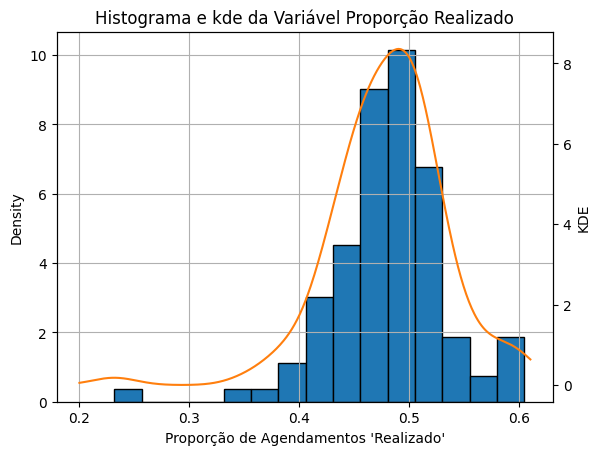

In [71]:
ax = (
    prop_r_us['Proporção Realizado']
    .plot(kind='hist', 
          density=True, 
          bins=15,
          edgecolor='black', 
          title="Histograma e kde da Variável Proporção Realizado",
          grid=True,
         )    
)
ax.set(xlabel="Proporção de Agendamentos 'Realizado'", ylabel='Densidade')
(
    prop_r_us['Proporção Realizado']
    .plot(kind='kde', ax=ax, secondary_y=True, ind=np.linspace(0.2, 0.61, 500), ylabel='KDE')
    .figure
    .savefig('hist3.pdf')
)

<AxesSubplot: >

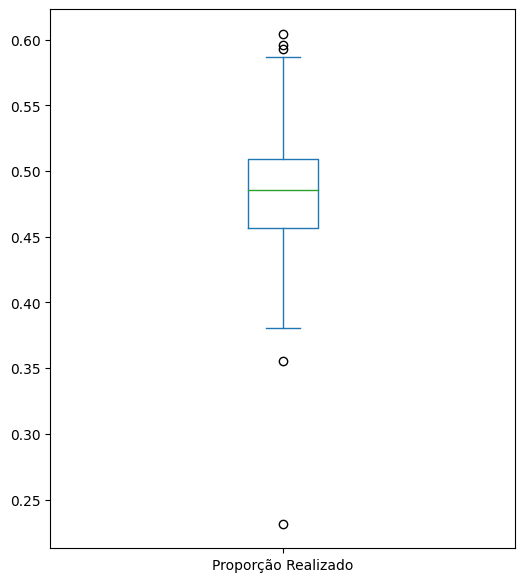

In [72]:
prop_r_us['Proporção Realizado'].plot(kind='box', figsize=(6, 7))

In [73]:
prop_r_us['Proporção Realizado'].mode()

0    0.5
Name: Proporção Realizado, dtype: float64

In [74]:
prop_r_us['Proporção Realizado'].describe()

count    107.000000
mean       0.480798
std        0.052147
min        0.231579
25%        0.456402
50%        0.485915
75%        0.509285
max        0.604430
Name: Proporção Realizado, dtype: float64

<AxesSubplot: xlabel='Proporção Realizado'>

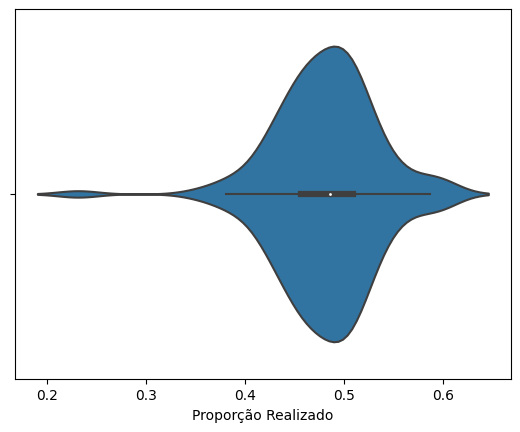

In [76]:
sns.violinplot(data=prop_r_us, x='Proporção Realizado')

In [ ]:
df.columns

### Pivoteando a tabela de forma a mostrar a frequência absoluta de cada valor da coluna *STATUS_AGENDAMENTO* em relação unidade de saúde:

In [77]:
ums = df.pivot_table(
    values='COD_AGENDA',
    columns='STATUS_AGENDAMENTO',
    index=['UMS_AGENDAMENTO'],
    fill_value=0,
    aggfunc='size'
)

ums

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado
UMS_AGENDAMENTO,,,,,
UMS ABAETE,3,274,188,457,0
UMS ABRANCHES,3,200,150,385,0
UMS ALVORADA PSF,7,369,356,743,0
UMS ATENAS,0,223,148,404,0
UMS ATUBA,7,61,38,95,0
...,...,...,...,...,...
UMS VISTA ALEGRE,2,169,160,269,0
UMS VITORIA REGIA PSF,11,229,172,527,0
UMS WALDEMAR MONASTIER PSF,6,193,178,356,0


### Calculando o total de agendamentos de cada unidade de saúde e calculando as proporções de *Faltoso*  em cada uma delas e arredondando para 2 casas decimais:

In [78]:
ums['Total'] = ums.sum(axis=1)

ums['Prop_Faltoso'] = (ums['Faltoso'] * 100 / ums['Total']).round(2)

ums

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Prop_Faltoso
UMS_AGENDAMENTO,,,,,,,
UMS ABAETE,3,274,188,457,0,922,20.39
UMS ABRANCHES,3,200,150,385,0,738,20.33
UMS ALVORADA PSF,7,369,356,743,0,1475,24.14
UMS ATENAS,0,223,148,404,0,775,19.10
UMS ATUBA,7,61,38,95,0,201,18.91
...,...,...,...,...,...,...,...
UMS VISTA ALEGRE,2,169,160,269,0,600,26.67
UMS VITORIA REGIA PSF,11,229,172,527,0,939,18.32
UMS WALDEMAR MONASTIER PSF,6,193,178,356,0,733,24.28


### Ordenando em ordem decrescente as linhas da coluna *Prop_Faltoso*:

In [79]:
ums.sort_values('Prop_Faltoso', ascending=False).head(10)

STATUS_AGENDAMENTO,Aguardando Remanejamento,Cancelado,Faltoso,Realizado,Remanejado,Total,Prop_Faltoso
UMS_AGENDAMENTO,,,,,,,
UMS CAMARGO,0,34,39,22,0,95,41.05
UMS PALMEIRAS PSF,0,153,157,202,0,512,30.66
UMS MONTEIRO LOBATO PSF,12,313,312,391,0,1028,30.35
UMS MAE CURITIBANA,7,553,496,582,0,1638,30.28
UMS UBERABA DE CIMA,4,236,240,313,0,793,30.26
UMS LOTIGUACU PSF,10,306,286,377,0,979,29.21
UMS OSWALDO CRUZ PSF,0,160,164,240,0,564,29.08
UMS NOSSA SENHORA DA LUZ PSF,3,136,153,247,0,539,28.39
UMS BAIRRO ALTO,0,471,440,645,0,1556,28.28


### Pivoteando a tabela de forma a mostrar a frequência absoluta de cada valor da coluna *STATUS_AGENDAMENTO* em relação a cada bairro e unidade de saúde:

In [80]:
reg_ums = df.pivot_table(
    values='COD_AGENDA',
    columns='STATUS_AGENDAMENTO',
    index=['REGIONAL_AGENDAMENTO', 'UMS_AGENDAMENTO'],
    fill_value=0,
    aggfunc='count'
)

reg_ums

STATUS_AGENDAMENTO                                    Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                             
BAIRRO NOVO          UMS BAIRRO NOVO PSF                                    11   
                     UMS COQUEIROS PSF                                      13   
                     UMS JOAO CANDIDO PSF                                    2   
                     UMS NOSSA SENHORA APARECIDA PSF                         9   
                     UMS OSTERNACK PSF                                       3   
...                                                                        ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF                               0   
                     UMS MORADIAS SANTA RITA PSF                             7   
                     UMS PALMEIRAS PSF                                       0   
                     UMS POMPEIA PSF                                         5   
                     UMS RIO BONITO PSF                                      0   

STATUS_AGENDAMENTO                                    Cancelado  Faltoso  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    377      259   
                     UMS COQUEIROS PSF                      283      261   
                     UMS JOAO CANDIDO PSF                   236      200   
                     UMS NOSSA SENHORA APARECIDA PSF        276      254   
                     UMS OSTERNACK PSF                      222      202   
...                                                         ...      ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              173      199   
                     UMS MORADIAS SANTA RITA PSF            250      223   
                     UMS PALMEIRAS PSF                      153      157   
                     UMS POMPEIA PSF                        275      208   
                     UMS RIO BONITO PSF                     341      261   

STATUS_AGENDAMENTO                                    Realizado  Remanejado  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                         
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    493           0  
                     UMS COQUEIROS PSF                      404           0  
                     UMS JOAO CANDIDO PSF                   370           1  
                     UMS NOSSA SENHORA APARECIDA PSF        456           0  
                     UMS OSTERNACK PSF                      446           0  
...                                                         ...         ...  
TATUQUARA            UMS MORADIAS DA ORDEM PSF              355           0  
                     UMS MORADIAS SANTA RITA PSF            431           2  
                     UMS PALMEIRAS PSF                      202           0  
                     UMS POMPEIA PSF                        391           0  
                     UMS RIO BONITO PSF                     550           1  

[107 rows x 5 columns]

### Calculando o total de agendamentos de cada unidade de saúde e calculando as proporções de *Faltoso*  em cada uma delas e arredondando para 2 casas decimais:

In [81]:
reg_ums['Total'] = reg_ums.sum(axis=1)

reg_ums['Prop_Faltoso'] = (reg_ums['Faltoso'] * 100 / reg_ums['Total']).round(2)

reg_ums

STATUS_AGENDAMENTO                                    Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                             
BAIRRO NOVO          UMS BAIRRO NOVO PSF                                    11   
                     UMS COQUEIROS PSF                                      13   
                     UMS JOAO CANDIDO PSF                                    2   
                     UMS NOSSA SENHORA APARECIDA PSF                         9   
                     UMS OSTERNACK PSF                                       3   
...                                                                        ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF                               0   
                     UMS MORADIAS SANTA RITA PSF                             7   
                     UMS PALMEIRAS PSF                                       0   
                     UMS POMPEIA PSF                                         5   
                     UMS RIO BONITO PSF                                      0   

STATUS_AGENDAMENTO                                    Cancelado  Faltoso  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    377      259   
                     UMS COQUEIROS PSF                      283      261   
                     UMS JOAO CANDIDO PSF                   236      200   
                     UMS NOSSA SENHORA APARECIDA PSF        276      254   
                     UMS OSTERNACK PSF                      222      202   
...                                                         ...      ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              173      199   
                     UMS MORADIAS SANTA RITA PSF            250      223   
                     UMS PALMEIRAS PSF                      153      157   
                     UMS POMPEIA PSF                        275      208   
                     UMS RIO BONITO PSF                     341      261   

STATUS_AGENDAMENTO                                    Realizado  Remanejado  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                          
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    493           0   
                     UMS COQUEIROS PSF                      404           0   
                     UMS JOAO CANDIDO PSF                   370           1   
                     UMS NOSSA SENHORA APARECIDA PSF        456           0   
                     UMS OSTERNACK PSF                      446           0   
...                                                         ...         ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              355           0   
                     UMS MORADIAS SANTA RITA PSF            431           2   
                     UMS PALMEIRAS PSF                      202           0   
                     UMS POMPEIA PSF                        391           0   
                     UMS RIO BONITO PSF                     550           1   

STATUS_AGENDAMENTO                                    Total  Prop_Faltoso  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF               1140         22.72  
                     UMS COQUEIROS PSF                  961         27.16  
                     UMS JOAO CANDIDO PSF               809         24.72  
                     UMS NOSSA SENHORA APARECIDA PSF    995         25.53  
                     UMS OSTERNACK PSF                  873         23.14  
...                                                     ...           ...  
TATUQUARA            UMS MORADIAS DA ORDEM PSF          727         27.37  
                     UMS MORADIAS SANTA RITA PSF        913         24.42  
                     UMS PALMEIRAS PSF                  512         30.66  
                     UMS POMPEIA PSF                    879         23.66  
    

### Ordenando em ordem decrescente as linhas da coluna *Prop_Faltoso*:

In [82]:
reg_ums.sort_values('Prop_Faltoso', ascending=False)

STATUS_AGENDAMENTO                              Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
CAJURU               UMS CAMARGO                                       0   
TATUQUARA            UMS PALMEIRAS PSF                                 0   
                     UMS MONTEIRO LOBATO PSF                          12   
MATRIZ               UMS MAE CURITIBANA                                7   
CAJURU               UMS UBERABA DE CIMA                               4   
...                                                                  ...   
BOQUEIRAO            UMS MORADIAS BELEM PSF                            9   
                     UMS ERICO VERISSIMO PSF                          21   
                     UMS JARDIM PARANAENSE PSF                         0   
SANTA FELICIDADE     UMS SANTA FELICIDADE                             13   
BOQUEIRAO            UMS VISITACAO                                    10   

STATUS_AGENDAMENTO                              Cancelado  Faltoso  Realizado  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                            
CAJURU               UMS CAMARGO                       34       39         22   
TATUQUARA            UMS PALMEIRAS PSF                153      157        202   
                     UMS MONTEIRO LOBATO PSF          313      312        391   
MATRIZ               UMS MAE CURITIBANA               553      496        582   
CAJURU               UMS UBERABA DE CIMA              236      240        313   
...                                                   ...      ...        ...   
BOQUEIRAO            UMS MORADIAS BELEM PSF           360      256        955   
                     UMS ERICO VERISSIMO PSF          571      362       1327   
                     UMS JARDIM PARANAENSE PSF        455      200        723   
SANTA FELICIDADE     UMS SANTA FELICIDADE             199      111        477   
BOQUEIRAO            UMS VISITACAO                    349      150        723   

STATUS_AGENDAMENTO                              Remanejado  Total  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                
CAJURU               UMS CAMARGO                         0     95   
TATUQUARA            UMS PALMEIRAS PSF                   0    512   
                     UMS MONTEIRO LOBATO PSF             0   1028   
MATRIZ               UMS MAE CURITIBANA                  0   1638   
CAJURU               UMS UBERABA DE CIMA                 0    793   
...                                                    ...    ...   
BOQUEIRAO            UMS MORADIAS BELEM PSF              0   1580   
                     UMS ERICO VERISSIMO PSF             0   2281   
                     UMS JARDIM PARANAENSE PSF           0   1378   
SANTA FELICIDADE     UMS SANTA FELICIDADE                0    800   
BOQUEIRAO            UMS VISITACAO                       0   1232   

STATUS_AGENDAMENTO                              Prop_Faltoso  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                          
CAJURU               UMS CAMARGO                       41.05  
TATUQUARA            UMS PALMEIRAS PSF                 30.66  
                     UMS MONTEIRO LOBATO PSF           30.35  
MATRIZ               UMS MAE CURITIBANA                30.28  
CAJURU               UMS UBERABA DE CIMA               30.26  
...                                                      ...  
BOQUEIRAO            UMS MORADIAS BELEM PSF            16.20  
                     UMS ERICO VERISSIMO PSF           15.87  
                     UMS JARDIM PARANAENSE PSF         14.51  
SANTA FELICIDADE     UMS SANTA FELICIDADE              13.88  
BOQUEIRAO            UMS VISITACAO                     12.18  

[107 rows x 7 columns]

### Pivoteando a tabela de forma a mostrar a frequência absoluta de cada valor da coluna *STATUS_AGENDAMENTO* em relação a cada profissinal de saúde:

In [83]:
pro_sau = df.pivot_table(
    values='COD_AGENDA',
    columns='STATUS_AGENDAMENTO',
    index=['COD_PROFISSIONAL', 'DESDOBRAMENTO'],
    fill_value=0,
    aggfunc='count'
)

pro_sau

STATUS_AGENDAMENTO                                                   Aguardando Remanejamento  \
COD_PROFISSIONAL DESDOBRAMENTO                                                                  
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                                        0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...                         0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...                         0   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL                                0   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                                    0   
...                                                                                       ...   
125223           AGENDAMENTO: MEDICO ESF                                                    0   
                 AGENDAMENTO: PRIMEIRO ATENDIMENTO ODONTOLÓGICO                             0   
                 NÃO                                                                        0   
126397           AGENDAMENTO: ODONTOLOGIA - CLINICA GERAL                                   0   
                 NÃO                                                                        0   

STATUS_AGENDAMENTO                                                   Cancelado  \
COD_PROFISSIONAL DESDOBRAMENTO                                                   
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                         0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...         49   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...         15   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL                 3   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                     4   
...                                                                        ...   
125223           AGENDAMENTO: MEDICO ESF                                     1   
                 AGENDAMENTO: PRIMEIRO ATENDIMENTO ODONTOLÓGICO              0   
                 NÃO                                                         2   
126397           AGENDAMENTO: ODONTOLOGIA - CLINICA GERAL                    0   
                 NÃO                                                         1   

STATUS_AGENDAMENTO                                                   Faltoso  \
COD_PROFISSIONAL DESDOBRAMENTO                                                 
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                       0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...        2   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...        1   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL               1   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                   1   
...                                                                      ...   
125223           AGENDAMENTO: MEDICO ESF                                   0   
                 AGENDAMENTO: PRIMEIRO ATENDIMENTO ODONTOLÓGICO            0   
                 NÃO                                                       4   
126397           AGENDAMENTO: ODONTOLOGIA - CLINICA GERAL                  0   
                 NÃO                                                       0   

STATUS_AGENDAMENTO                                                   Realizado  \
COD_PROFISSIONAL DESDOBRAMENTO                                                   
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                         1   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...          5   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...          3   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL                51   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                    43   
...                                                     

### Calculando o total de agendamentos de cada unidade de saúde e calculando as proporções de *Faltoso*  em cada uma delas e arredondando para 2 casas decimais:

In [84]:
pro_sau['Total'] = pro_sau.sum(axis=1)

pro_sau['Prop_Faltoso'] = (pro_sau['Faltoso'] * 100 / pro_sau['Total']).round(2)
pro_sau

STATUS_AGENDAMENTO                                                   Aguardando Remanejamento  \
COD_PROFISSIONAL DESDOBRAMENTO                                                                  
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                                        0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...                         0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...                         0   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL                                0   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                                    0   
...                                                                                       ...   
125223           AGENDAMENTO: MEDICO ESF                                                    0   
                 AGENDAMENTO: PRIMEIRO ATENDIMENTO ODONTOLÓGICO                             0   
                 NÃO                                                                        0   
126397           AGENDAMENTO: ODONTOLOGIA - CLINICA GERAL                                   0   
                 NÃO                                                                        0   

STATUS_AGENDAMENTO                                                   Cancelado  \
COD_PROFISSIONAL DESDOBRAMENTO                                                   
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                         0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...         49   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...         15   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL                 3   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                     4   
...                                                                        ...   
125223           AGENDAMENTO: MEDICO ESF                                     1   
                 AGENDAMENTO: PRIMEIRO ATENDIMENTO ODONTOLÓGICO              0   
                 NÃO                                                         2   
126397           AGENDAMENTO: ODONTOLOGIA - CLINICA GERAL                    0   
                 NÃO                                                         1   

STATUS_AGENDAMENTO                                                   Faltoso  \
COD_PROFISSIONAL DESDOBRAMENTO                                                 
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                       0   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...        2   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...        1   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL               1   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                   1   
...                                                                      ...   
125223           AGENDAMENTO: MEDICO ESF                                   0   
                 AGENDAMENTO: PRIMEIRO ATENDIMENTO ODONTOLÓGICO            0   
                 NÃO                                                       4   
126397           AGENDAMENTO: ODONTOLOGIA - CLINICA GERAL                  0   
                 NÃO                                                       0   

STATUS_AGENDAMENTO                                                   Realizado  \
COD_PROFISSIONAL DESDOBRAMENTO                                                   
2883             AGENDAMENTO: ACOLHIMENTO - TESTAGEM                         1   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ENFER...          5   
                 AGENDAMENTO: AGENDA AUTOMÁTICA SAÚDE JÁ - ODONT...          3   
                 AGENDAMENTO: ATENDIMENTO CLINICO PRESENCIAL                51   
                 AGENDAMENTO: AUXILIAR DE ENFERMAGEM ESF                    43   
...                                                     

In [85]:
df[df['DESDOBRAMENTO'].str.contains('Monitoramento')]

,COD_CIDADAO,UMS_AGENDAMENTO,COD_PROFISSIONAL,STATUS_AGENDAMENTO,REGIONAL_AGENDAMENTO,DATA_ATENDIMENTO,HORA_ATENDIMENTO,DESDOBRAMENTO,TIPO_USUARIO,COD_AGENDA,TURNO


### Separando os dados em turno da manhã e da tarde:

In [86]:
morning = df[df['HORA_ATENDIMENTO'] < 12].copy()
afternoon = df[df['HORA_ATENDIMENTO'] >= 12].copy()

### Pivoteando a tabela de forma a mostrar a frequência absoluta de cada valor da coluna *STATUS_AGENDAMENTO* em relação a cada bairro e unidade de saúde no período da manhã:

In [87]:
morning_shift = morning.pivot_table(
    values='COD_AGENDA',
    columns='STATUS_AGENDAMENTO',
    index=['REGIONAL_AGENDAMENTO', 'UMS_AGENDAMENTO'],
    fill_value=0,
    aggfunc='count'
)

morning_shift

STATUS_AGENDAMENTO                                    Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                             
BAIRRO NOVO          UMS BAIRRO NOVO PSF                                     7   
                     UMS COQUEIROS PSF                                       7   
                     UMS JOAO CANDIDO PSF                                    2   
                     UMS NOSSA SENHORA APARECIDA PSF                         5   
                     UMS OSTERNACK PSF                                       1   
...                                                                        ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF                               0   
                     UMS MORADIAS SANTA RITA PSF                             6   
                     UMS PALMEIRAS PSF                                       0   
                     UMS POMPEIA PSF                                         3   
                     UMS RIO BONITO PSF                                      0   

STATUS_AGENDAMENTO                                    Cancelado  Faltoso  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    211      121   
                     UMS COQUEIROS PSF                      144      127   
                     UMS JOAO CANDIDO PSF                   112       94   
                     UMS NOSSA SENHORA APARECIDA PSF        133      133   
                     UMS OSTERNACK PSF                      115      109   
...                                                         ...      ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              117      135   
                     UMS MORADIAS SANTA RITA PSF            146      133   
                     UMS PALMEIRAS PSF                      105      114   
                     UMS POMPEIA PSF                        114       88   
                     UMS RIO BONITO PSF                     193      136   

STATUS_AGENDAMENTO                                    Realizado  Remanejado  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                         
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    285           0  
                     UMS COQUEIROS PSF                      203           0  
                     UMS JOAO CANDIDO PSF                   177           0  
                     UMS NOSSA SENHORA APARECIDA PSF        260           0  
                     UMS OSTERNACK PSF                      246           0  
...                                                         ...         ...  
TATUQUARA            UMS MORADIAS DA ORDEM PSF              215           0  
                     UMS MORADIAS SANTA RITA PSF            279           2  
                     UMS PALMEIRAS PSF                      155           0  
                     UMS POMPEIA PSF                        170           0  
                     UMS RIO BONITO PSF                     334           1  

[107 rows x 5 columns]

### Calculando o total de agendamentos de cada unidade de saúde e calculando as proporções de *Faltoso*  em cada uma delas e arredondando para 2 casas decimais:

In [88]:
morning_shift['Total'] = morning_shift.sum(axis=1)

morning_shift['Prop_Faltoso'] = (morning_shift['Faltoso'] * 100 / morning_shift['Total']).round(2)

morning_shift

STATUS_AGENDAMENTO                                    Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                             
BAIRRO NOVO          UMS BAIRRO NOVO PSF                                     7   
                     UMS COQUEIROS PSF                                       7   
                     UMS JOAO CANDIDO PSF                                    2   
                     UMS NOSSA SENHORA APARECIDA PSF                         5   
                     UMS OSTERNACK PSF                                       1   
...                                                                        ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF                               0   
                     UMS MORADIAS SANTA RITA PSF                             6   
                     UMS PALMEIRAS PSF                                       0   
                     UMS POMPEIA PSF                                         3   
                     UMS RIO BONITO PSF                                      0   

STATUS_AGENDAMENTO                                    Cancelado  Faltoso  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    211      121   
                     UMS COQUEIROS PSF                      144      127   
                     UMS JOAO CANDIDO PSF                   112       94   
                     UMS NOSSA SENHORA APARECIDA PSF        133      133   
                     UMS OSTERNACK PSF                      115      109   
...                                                         ...      ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              117      135   
                     UMS MORADIAS SANTA RITA PSF            146      133   
                     UMS PALMEIRAS PSF                      105      114   
                     UMS POMPEIA PSF                        114       88   
                     UMS RIO BONITO PSF                     193      136   

STATUS_AGENDAMENTO                                    Realizado  Remanejado  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                          
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    285           0   
                     UMS COQUEIROS PSF                      203           0   
                     UMS JOAO CANDIDO PSF                   177           0   
                     UMS NOSSA SENHORA APARECIDA PSF        260           0   
                     UMS OSTERNACK PSF                      246           0   
...                                                         ...         ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              215           0   
                     UMS MORADIAS SANTA RITA PSF            279           2   
                     UMS PALMEIRAS PSF                      155           0   
                     UMS POMPEIA PSF                        170           0   
                     UMS RIO BONITO PSF                     334           1   

STATUS_AGENDAMENTO                                    Total  Prop_Faltoso  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                624         19.39  
                     UMS COQUEIROS PSF                  481         26.40  
                     UMS JOAO CANDIDO PSF               385         24.42  
                     UMS NOSSA SENHORA APARECIDA PSF    531         25.05  
                     UMS OSTERNACK PSF                  471         23.14  
...                                                     ...           ...  
TATUQUARA            UMS MORADIAS DA ORDEM PSF          467         28.91  
                     UMS MORADIAS SANTA RITA PSF        566         23.50  
                     UMS PALMEIRAS PSF                  374         30.48  
                     UMS POMPEIA PSF                    375         23.47  
    

### Ordenando em ordem decrescente as linhas da coluna *Prop_Faltoso*:

In [89]:
morning_shift.sort_values('Prop_Faltoso', ascending=False)

STATUS_AGENDAMENTO                              Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
CAJURU               UMS CAMARGO                                       0   
MATRIZ               UMS MAE CURITIBANA                                0   
SANTA FELICIDADE     UMS VISTA ALEGRE                                  2   
TATUQUARA            UMS PALMEIRAS PSF                                 0   
                     UMS MONTEIRO LOBATO PSF                           7   
...                                                                  ...   
BOQUEIRAO            UMS MENONITAS                                     2   
                     UMS JARDIM PARANAENSE PSF                         0   
                     UMS VISITACAO                                     4   
BOA VISTA            UMS ATUBA                                         4   
SANTA FELICIDADE     UMS SANTA FELICIDADE                              0   

STATUS_AGENDAMENTO                              Cancelado  Faltoso  Realizado  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                            
CAJURU               UMS CAMARGO                       14       12          7   
MATRIZ               UMS MAE CURITIBANA               249      264        221   
SANTA FELICIDADE     UMS VISTA ALEGRE                  74       85        108   
TATUQUARA            UMS PALMEIRAS PSF                105      114        155   
                     UMS MONTEIRO LOBATO PSF          203      194        236   
...                                                   ...      ...        ...   
BOQUEIRAO            UMS MENONITAS                    119       74        315   
                     UMS JARDIM PARANAENSE PSF        283      123        461   
                     UMS VISITACAO                    166       79        364   
BOA VISTA            UMS ATUBA                         36       12         43   
SANTA FELICIDADE     UMS SANTA FELICIDADE              48       20        149   

STATUS_AGENDAMENTO                              Remanejado  Total  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                
CAJURU               UMS CAMARGO                         0     33   
MATRIZ               UMS MAE CURITIBANA                  0    734   
SANTA FELICIDADE     UMS VISTA ALEGRE                    0    269   
TATUQUARA            UMS PALMEIRAS PSF                   0    374   
                     UMS MONTEIRO LOBATO PSF             0    640   
...                                                    ...    ...   
BOQUEIRAO            UMS MENONITAS                       0    510   
                     UMS JARDIM PARANAENSE PSF           0    867   
                     UMS VISITACAO                       0    613   
BOA VISTA            UMS ATUBA                           0     95   
SANTA FELICIDADE     UMS SANTA FELICIDADE                0    217   

STATUS_AGENDAMENTO                              Prop_Faltoso  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                          
CAJURU               UMS CAMARGO                       36.36  
MATRIZ               UMS MAE CURITIBANA                35.97  
SANTA FELICIDADE     UMS VISTA ALEGRE                  31.60  
TATUQUARA            UMS PALMEIRAS PSF                 30.48  
                     UMS MONTEIRO LOBATO PSF           30.31  
...                                                      ...  
BOQUEIRAO            UMS MENONITAS                     14.51  
                     UMS JARDIM PARANAENSE PSF         14.19  
                     UMS VISITACAO                     12.89  
BOA VISTA            UMS ATUBA                         12.63  
SANTA FELICIDADE     UMS SANTA FELICIDADE               9.22  

[107 rows x 7 columns]

### Pivoteando a tabela de forma a mostrar a frequência absoluta de cada valor da coluna *STATUS_AGENDAMENTO* em relação a cada bairro e unidade de saúde no período da tarde:

In [90]:
afternoon_shift = afternoon.pivot_table(
    values='COD_AGENDA',
    columns='STATUS_AGENDAMENTO',
    index=['REGIONAL_AGENDAMENTO', 'UMS_AGENDAMENTO'],
    fill_value=0,
    aggfunc='count'
)

afternoon_shift

STATUS_AGENDAMENTO                                    Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                             
BAIRRO NOVO          UMS BAIRRO NOVO PSF                                     4   
                     UMS COQUEIROS PSF                                       6   
                     UMS JOAO CANDIDO PSF                                    0   
                     UMS NOSSA SENHORA APARECIDA PSF                         4   
                     UMS OSTERNACK PSF                                       2   
...                                                                        ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF                               0   
                     UMS MORADIAS SANTA RITA PSF                             1   
                     UMS PALMEIRAS PSF                                       0   
                     UMS POMPEIA PSF                                         2   
                     UMS RIO BONITO PSF                                      0   

STATUS_AGENDAMENTO                                    Cancelado  Faltoso  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    166      138   
                     UMS COQUEIROS PSF                      139      134   
                     UMS JOAO CANDIDO PSF                   124      106   
                     UMS NOSSA SENHORA APARECIDA PSF        143      121   
                     UMS OSTERNACK PSF                      107       93   
...                                                         ...      ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF               56       64   
                     UMS MORADIAS SANTA RITA PSF            104       90   
                     UMS PALMEIRAS PSF                       48       43   
                     UMS POMPEIA PSF                        161      120   
                     UMS RIO BONITO PSF                     148      125   

STATUS_AGENDAMENTO                                    Realizado  Remanejado  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                         
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    208           0  
                     UMS COQUEIROS PSF                      201           0  
                     UMS JOAO CANDIDO PSF                   193           1  
                     UMS NOSSA SENHORA APARECIDA PSF        196           0  
                     UMS OSTERNACK PSF                      200           0  
...                                                         ...         ...  
TATUQUARA            UMS MORADIAS DA ORDEM PSF              140           0  
                     UMS MORADIAS SANTA RITA PSF            152           0  
                     UMS PALMEIRAS PSF                       47           0  
                     UMS POMPEIA PSF                        221           0  
                     UMS RIO BONITO PSF                     216           0  

[107 rows x 5 columns]

### Calculando o total de agendamentos de cada unidade de saúde e calculando as proporções de Faltoso em cada uma delas e arredondando para 2 casas decimais:

In [91]:
afternoon_shift['Total'] = afternoon_shift.sum(axis=1)

afternoon_shift['Prop_Faltoso'] = (afternoon_shift['Faltoso'] * 100 / afternoon_shift['Total']).round(2)

afternoon_shift

STATUS_AGENDAMENTO                                    Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                             
BAIRRO NOVO          UMS BAIRRO NOVO PSF                                     4   
                     UMS COQUEIROS PSF                                       6   
                     UMS JOAO CANDIDO PSF                                    0   
                     UMS NOSSA SENHORA APARECIDA PSF                         4   
                     UMS OSTERNACK PSF                                       2   
...                                                                        ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF                               0   
                     UMS MORADIAS SANTA RITA PSF                             1   
                     UMS PALMEIRAS PSF                                       0   
                     UMS POMPEIA PSF                                         2   
                     UMS RIO BONITO PSF                                      0   

STATUS_AGENDAMENTO                                    Cancelado  Faltoso  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    166      138   
                     UMS COQUEIROS PSF                      139      134   
                     UMS JOAO CANDIDO PSF                   124      106   
                     UMS NOSSA SENHORA APARECIDA PSF        143      121   
                     UMS OSTERNACK PSF                      107       93   
...                                                         ...      ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF               56       64   
                     UMS MORADIAS SANTA RITA PSF            104       90   
                     UMS PALMEIRAS PSF                       48       43   
                     UMS POMPEIA PSF                        161      120   
                     UMS RIO BONITO PSF                     148      125   

STATUS_AGENDAMENTO                                    Realizado  Remanejado  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                          
BAIRRO NOVO          UMS BAIRRO NOVO PSF                    208           0   
                     UMS COQUEIROS PSF                      201           0   
                     UMS JOAO CANDIDO PSF                   193           1   
                     UMS NOSSA SENHORA APARECIDA PSF        196           0   
                     UMS OSTERNACK PSF                      200           0   
...                                                         ...         ...   
TATUQUARA            UMS MORADIAS DA ORDEM PSF              140           0   
                     UMS MORADIAS SANTA RITA PSF            152           0   
                     UMS PALMEIRAS PSF                       47           0   
                     UMS POMPEIA PSF                        221           0   
                     UMS RIO BONITO PSF                     216           0   

STATUS_AGENDAMENTO                                    Total  Prop_Faltoso  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
BAIRRO NOVO          UMS BAIRRO NOVO PSF                516         26.74  
                     UMS COQUEIROS PSF                  480         27.92  
                     UMS JOAO CANDIDO PSF               424         25.00  
                     UMS NOSSA SENHORA APARECIDA PSF    464         26.08  
                     UMS OSTERNACK PSF                  402         23.13  
...                                                     ...           ...  
TATUQUARA            UMS MORADIAS DA ORDEM PSF          260         24.62  
                     UMS MORADIAS SANTA RITA PSF        347         25.94  
                     UMS PALMEIRAS PSF                  138         31.16  
                     UMS POMPEIA PSF                    504         23.81  
    

### Ordenando em ordem decrescente as linhas da coluna *Prop_Faltoso*:

In [92]:
afternoon_shift.sort_values('Prop_Faltoso', ascending=False)

STATUS_AGENDAMENTO                              Aguardando Remanejamento  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                       
CAJURU               UMS CAMARGO                                       0   
                     UMS UBERABA DE CIMA                               1   
                     UMS LOTIGUACU PSF                                 1   
TATUQUARA            UMS PALMEIRAS PSF                                 0   
CIC                  UMS JARDIM GABINETO PSF                           3   
...                                                                  ...   
BOQUEIRAO            UMS ERICO VERISSIMO PSF                           6   
CIC                  UMS VITORIA REGIA PSF                             5   
SANTA FELICIDADE     UMS SANTA FELICIDADE                             13   
BOQUEIRAO            UMS JARDIM PARANAENSE PSF                         0   
                     UMS VISITACAO                                     6   

STATUS_AGENDAMENTO                              Cancelado  Faltoso  Realizado  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                            
CAJURU               UMS CAMARGO                       20       27         15   
                     UMS UBERABA DE CIMA              133      144        141   
                     UMS LOTIGUACU PSF                147      161        196   
TATUQUARA            UMS PALMEIRAS PSF                 48       43         47   
CIC                  UMS JARDIM GABINETO PSF          108      107        129   
...                                                   ...      ...        ...   
BOQUEIRAO            UMS ERICO VERISSIMO PSF          192      114        403   
CIC                  UMS VITORIA REGIA PSF            113       71        260   
SANTA FELICIDADE     UMS SANTA FELICIDADE             151       91        328   
BOQUEIRAO            UMS JARDIM PARANAENSE PSF        172       77        262   
                     UMS VISITACAO                    183       71        359   

STATUS_AGENDAMENTO                              Remanejado  Total  \
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                                
CAJURU               UMS CAMARGO                         0     62   
                     UMS UBERABA DE CIMA                 0    419   
                     UMS LOTIGUACU PSF                   0    505   
TATUQUARA            UMS PALMEIRAS PSF                   0    138   
CIC                  UMS JARDIM GABINETO PSF             0    347   
...                                                    ...    ...   
BOQUEIRAO            UMS ERICO VERISSIMO PSF             0    715   
CIC                  UMS VITORIA REGIA PSF               0    449   
SANTA FELICIDADE     UMS SANTA FELICIDADE                0    583   
BOQUEIRAO            UMS JARDIM PARANAENSE PSF           0    511   
                     UMS VISITACAO                       0    619   

STATUS_AGENDAMENTO                              Prop_Faltoso  
REGIONAL_AGENDAMENTO UMS_AGENDAMENTO                          
CAJURU               UMS CAMARGO                       43.55  
                     UMS UBERABA DE CIMA               34.37  
                     UMS LOTIGUACU PSF                 31.88  
TATUQUARA            UMS PALMEIRAS PSF                 31.16  
CIC                  UMS JARDIM GABINETO PSF           30.84  
...                                                      ...  
BOQUEIRAO            UMS ERICO VERISSIMO PSF           15.94  
CIC                  UMS VITORIA REGIA PSF             15.81  
SANTA FELICIDADE     UMS SANTA FELICIDADE              15.61  
BOQUEIRAO            UMS JARDIM PARANAENSE PSF         15.07  
                     UMS VISITACAO                     11.47  

[107 rows x 7 columns]